In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import re
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')

font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [36]:
cafe = pd.read_csv('./result/구별 카페.csv', sep=',')
rest = pd.read_csv('./result/구별 한식점.csv', sep=',')
missing = pd.read_csv('./result/구별 신고 건수.csv', sep=',')
l_store = pd.read_csv('./result/구별 대규모점포.csv', sep=',')
유원지 = pd.read_csv('./result/구별 유원시설.csv', sep=',')
pop = pd.read_csv('./result/자치구 요일별 총생활인구.csv', sep=',')
park = pd.read_csv('./result/구별 공원개수.csv', sep=',')
소비 = pd.read_csv('./result/지역별_영유아가족_공휴일_소비.csv', sep=',')
liv_pop = pd.read_csv('./result/구별 거주인구.csv', sep=',')

In [37]:
df = pd.merge(cafe, rest, on='자치구', how='outer')
df = pd.merge(df, missing, on='자치구', how='outer')
df = pd.merge(df, l_store, on='자치구', how='outer')
df = pd.merge(df, 유원지, on='자치구', how='outer')
df = pd.merge(df, pop, on='자치구', how='outer')
df = pd.merge(df, park, on='자치구', how='outer')
df = pd.merge(df, 소비, on='자치구', how='outer')
df = pd.merge(df, liv_pop, on='자치구', how='outer')

In [38]:
df.fillna(0, inplace=True)

In [39]:
df.to_csv('./result/data.csv', sep=',', index=False)

## try0

In [40]:
df.columns

Index(['자치구', '카페 개수', '한식점 개수', '실종 아동 신고 건수', '대규모점포', '유원시설', '시군구코드',
       'day', '총생활인구수', '10세미만생활인구', '공원개수', '영유아가족_소비건수', '인구'],
      dtype='object')

In [41]:
df = df[['자치구', '카페 개수', '한식점 개수', '대규모점포', '유원시설', '시군구코드',
       'day', '총생활인구수', '10세미만생활인구', '공원개수', '영유아가족_소비건수', '인구', '실종 아동 신고 건수']]

In [42]:
df_n = df.groupby(['자치구', '카페 개수', '한식점 개수', '대규모점포', '유원시설', '공원개수', '영유아가족_소비건수', '실종 아동 신고 건수', '인구'])[['총생활인구수', '10세미만생활인구']].mean().reset_index()

In [43]:
df_n = df_n[['자치구', '카페 개수', '한식점 개수', '대규모점포', '유원시설', '공원개수', '영유아가족_소비건수', '총생활인구수', '10세미만생활인구', '인구', '실종 아동 신고 건수']]

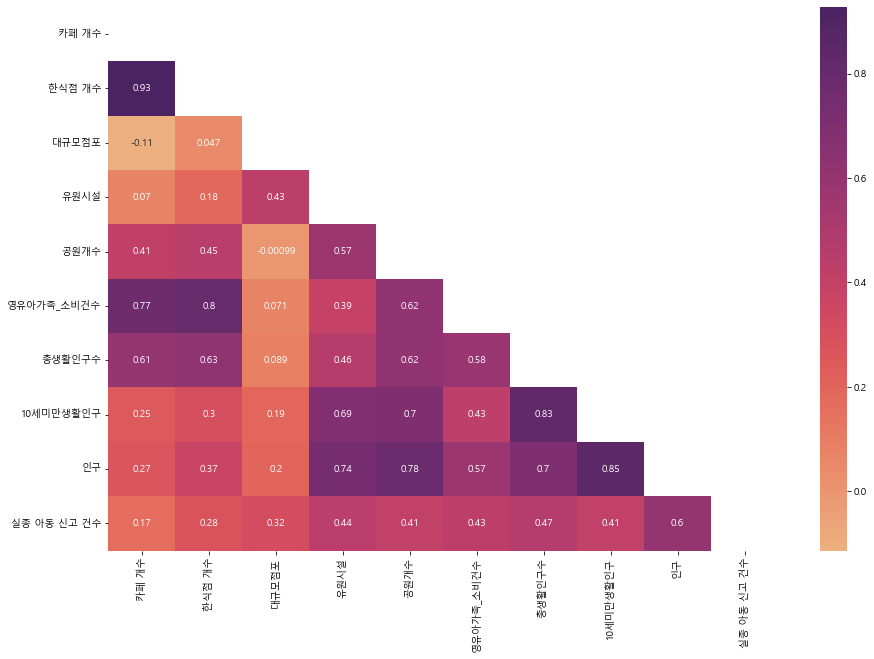

In [44]:
mask = np.zeros_like(df_n.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(df_n.corr(), annot=True, mask=mask, cmap='flare')
plt.savefig('./result/heatmap.png')

In [11]:
from sklearn.preprocessing import MinMaxScaler

X = df_n[df_n.columns[1:-1]]
y = df_n[['실종 아동 신고 건수']]
scaler = MinMaxScaler()
df_n[df_n.columns[1:-1]] = scaler.fit_transform(X)

In [12]:
df_n

,자치구,카페 개수,한식점 개수,대규모점포,유원시설,공원개수,영유아가족_소비건수,총생활인구수,10세미만생활인구,인구,실종 아동 신고 건수
0,강남구,1.000000,1.000000,0.142857,0.35,0.705882,0.910148,1.000000,0.974939,0.761898,91
1,강동구,0.225509,0.246182,0.714286,0.65,0.264706,0.253453,0.573757,1.000000,0.630433,81
2,강북구,0.000000,0.160364,0.571429,0.50,0.051471,0.000000,0.313562,0.540582,0.323259,72
3,강서구,0.355965,0.372000,0.428571,1.00,0.742647,0.652166,0.522496,0.896888,0.842922,82
4,관악구,0.201261,0.233818,0.285714,0.25,0.279412,0.144098,0.317360,0.363011,0.693419,141
5,광진구,0.221629,0.140727,0.285714,0.40,0.014706,0.195690,0.384866,0.569579,0.415413,82
6,구로구,0.145975,0.180727,0.571429,0.45,0.080882,0.257471,0.457524,0.826359,0.544820,100
7,금천구,0.077110,0.066909,0.714286,0.30,0.102941,0.050558,0.278722,0.344353,0.211881,148
8,노원구,0.140155,0.106909,0.285714,0.50,1.000000,0.316619,0.535477,0.940324,0.722433,68
9,도봉구,0.025703,0.000000,0.285714,0.10,0.242647,0.009240,0.166871,0.497671,0.354126,65


In [13]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[df_n.columns[1:-1]])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                              15.86
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    2.24e-06
Time:                        08:40:25   Log-Likelihood:                         -117.43
No. Observations:                  25   AIC:                                      252.9
Df Residuals:                      16   BIC:                                      263.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [14]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,카페 개수,22.016307
1,한식점 개수,24.861521
2,대규모점포,5.009803
3,유원시설,10.318076
4,공원개수,5.558662
5,영유아가족_소비건수,10.149343
6,총생활인구수,30.377257
7,10세미만생활인구,50.888306
8,인구,30.751411


In [15]:
df_n.columns[1:-1]

Index(['카페 개수', '한식점 개수', '대규모점포', '유원시설', '공원개수', '영유아가족_소비건수', '총생활인구수',
       '10세미만생활인구', '인구'],
      dtype='object')

In [16]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[['카페 개수', '한식점 개수', '대규모점포', '유원시설', '공원개수', '영유아가족_소비건수', '10세미만생활인구', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              16.68
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    1.24e-06
Time:                        08:40:30   Log-Likelihood:                         -118.86
No. Observations:                  25   AIC:                                      253.7
Df Residuals:                      17   BIC:                                      263.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,카페 개수,21.337918
1,한식점 개수,23.525919
2,대규모점포,4.892213
3,유원시설,10.146758
4,공원개수,5.555147
5,영유아가족_소비건수,10.056704
6,10세미만생활인구,23.733336
7,인구,30.498818


In [18]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[['한식점 개수', '대규모점포', '유원시설', '공원개수', '영유아가족_소비건수', '10세미만생활인구', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              20.04
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    2.76e-07
Time:                        08:40:31   Log-Likelihood:                         -118.94
No. Observations:                  25   AIC:                                      251.9
Df Residuals:                      18   BIC:                                      260.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,한식점 개수,7.329714
1,대규모점포,4.690467
2,유원시설,9.914443
3,공원개수,5.540290
4,영유아가족_소비건수,9.364411
5,10세미만생활인구,21.101155
6,인구,29.399089


In [20]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[['한식점 개수', '대규모점포', '공원개수', '영유아가족_소비건수', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                              29.56
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    1.38e-08
Time:                        08:40:32   Log-Likelihood:                         -119.53
No. Observations:                  25   AIC:                                      249.1
Df Residuals:                      20   BIC:                                      255.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,한식점 개수,6.535887
1,대규모점포,3.699440
2,공원개수,5.341449
3,영유아가족_소비건수,8.579683
4,인구,10.195572


In [22]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[['대규모점포', '공원개수', '영유아가족_소비건수', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              38.79
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    2.05e-09
Time:                        08:40:36   Log-Likelihood:                         -119.53
No. Observations:                  25   AIC:                                      247.1
Df Residuals:                      21   BIC:                                      251.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,대규모점포,3.627651
1,공원개수,5.320198
2,영유아가족_소비건수,3.828336
3,인구,10.181399


In [24]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[['대규모점포', '영유아가족_소비건수', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              51.12
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    4.41e-10
Time:                        08:40:37   Log-Likelihood:                         -120.17
No. Observations:                  25   AIC:                                      246.3
Df Residuals:                      22   BIC:                                      250.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,대규모점포,3.032342
1,영유아가족_소비건수,3.443671
2,인구,5.741042


In [30]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[['대규모점포', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              79.65
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    4.58e-11
Time:                        00:52:46   Log-Likelihood:                         -120.24
No. Observations:                  25   AIC:                                      244.5
Df Residuals:                      23   BIC:                                      246.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,대규모점포,3.020963
1,인구,3.020963
